## How often does President Trump tweet each day?

In [12]:
import altair as alt
import pandas as pd
import psycopg2 as pg
import matplotlib as mpl
import numpy as np
import json
import pytz
from datetime import datetime
import altair_latimes as lat
alt.renderers.enable('notebook')
alt.themes.register('latimes', lat.theme)
alt.themes.enable('latimes')

ThemeRegistry.enable('latimes')

### Dump from trumptweetarchive.com

In [13]:
trump2019 = pd.read_json('http://www.trumptwitterarchive.com/data/realdonaldtrump/2019.json')
trump2018 = pd.read_json('http://www.trumptwitterarchive.com/data/realdonaldtrump/2018.json')
trump2017 = pd.read_json('http://www.trumptwitterarchive.com/data/realdonaldtrump/2017.json')
trump2016 = pd.read_json('http://www.trumptwitterarchive.com/data/realdonaldtrump/2016.json')
trump2015 = pd.read_json('http://www.trumptwitterarchive.com/data/realdonaldtrump/2015.json')
trump2014 = pd.read_json('http://www.trumptwitterarchive.com/data/realdonaldtrump/2014.json')
trump2013 = pd.read_json('http://www.trumptwitterarchive.com/data/realdonaldtrump/2013.json')
trump2012 = pd.read_json('http://www.trumptwitterarchive.com/data/realdonaldtrump/2012.json')
trump2011 = pd.read_json('http://www.trumptwitterarchive.com/data/realdonaldtrump/2011.json')
trump2010 = pd.read_json('http://www.trumptwitterarchive.com/data/realdonaldtrump/2010.json')
trump2009 = pd.read_json('http://www.trumptwitterarchive.com/data/realdonaldtrump/2009.json')

In [14]:
src = pd.concat([trump2019, trump2018, trump2017, trump2016, \
trump2015, trump2014, trump2013, trump2012, trump2011, trump2010, trump2009])

### Clean up dates

In [15]:
src.head()

,created_at,favorite_count,id_str,in_reply_to_user_id_str,is_retweet,retweet_count,source,text
0,2019-10-07 21:54:13,30041,1181326889480282112,NaN,False,10118,Twitter Media Studio,https://t.co/4zENOQPQ11
1,2019-10-07 16:52:40,39963,1181251003129180160,NaN,False,13395,Twitter Media Studio,Thank you @HeyTammyBruce! https://t.co/WYtJQmWv26
2,2019-10-07 16:48:06,28267,1181249853801877504,NaN,False,10442,Twitter Media Studio,"""The Truth About Impeachment""\n@SteveHiltonx @..."
3,2019-10-07 15:38:09,61300,1181232251390042112,25073877.0,False,15233,Twitter for iPhone,....the captured ISIS fighters and families. T...
4,2019-10-07 15:38:09,102158,1181232249821388800,NaN,False,31109,Twitter for iPhone,"As I have stated strongly before, and just to ..."


In [16]:
src['eastern_created_at'] = src['created_at'].dt.time
src['eastern_created_at'] = src['created_at'].dt.tz_localize("GMT").dt.tz_convert('America/Los_Angeles')
src['date'] = pd.to_datetime(src['eastern_created_at']).dt.strftime('%m/%d/%Y')
src['date'] = pd.to_datetime(src['date'])
src['year'] = src['eastern_created_at'].dt.year
src['month'] = src['eastern_created_at'].dt.month
src['day'] = src['eastern_created_at'].dt.day
src['hour'] = src['eastern_created_at'].dt.hour
src['minute'] = src['eastern_created_at'].dt.minute
src['time'] = src['eastern_created_at'].dt.time
src['id_str'] = src['id_str'].astype(str)
src['year'] = src['year'].astype(str)
src['month'] = src['month'].astype(str)
src['day'] = src['day'].astype(str)
src['hour'] = src['hour'].astype(str)

In [17]:
src.dtypes

created_at                                      datetime64[ns]
favorite_count                                           int64
id_str                                                  object
in_reply_to_user_id_str                                float64
is_retweet                                                bool
retweet_count                                            int64
source                                                  object
text                                                    object
eastern_created_at         datetime64[ns, America/Los_Angeles]
date                                            datetime64[ns]
year                                                    object
month                                                   object
day                                                     object
hour                                                    object
minute                                                   int64
time                                                   

### Tweets per year

In [18]:
trump_years = src.groupby(['year', 'month']).agg({'date': 'count'})

In [19]:
trump_years

date
year month      
2009 10        4
     11        3
     12        2
     5        21
     6        11
     7         5
     8         7
     9         3
2010 1         4
     10        9
     11       11
     12       10
     2         4
     3        10
     4        18
     5        17
     6        17
     7        13
     8        16
     9        13
2011 1         9
     10      106
     11      112
     12      184
     2        16
     3        36
     4         5
     5        13
     6        16
     7        73
...          ...
2017 2       153
     3       145
     4       152
     5       157
     6       210
     7       245
     8       267
     9       307
2018 1       150
     10      389
     11      340
     12      291
     2       175
     3       171
     4       257
     5       259
     6       386
     7       338
     8       383
     9       378
2019 1       369
     10      243
     2       250
     3       400
     4       431
     5       692
     6       492
     7       691
     8       686
     9       800

[126 rows x 1 columns]

### What did he average each day in retweets, likes and replies

In [20]:
trump_engagements_day = src.groupby(['date']).mean().round().reset_index()

In [21]:
trump_engagements_day.head()

,date,favorite_count,in_reply_to_user_id_str,is_retweet,retweet_count,minute
0,2009-05-04,102.0,NaN,0.0,128.0,27.0
1,2009-05-08,14.0,NaN,0.0,6.0,39.0
2,2009-05-12,982.0,NaN,0.0,716.0,14.0
3,2009-05-13,10.0,NaN,0.0,11.0,38.0
4,2009-05-14,6.0,NaN,0.0,3.0,30.0


### Limit data to when Trump took office

In [22]:
trumpall_prez = src[src.date >= '01/20/2017']

In [23]:
trumpall_prez

,created_at,favorite_count,id_str,in_reply_to_user_id_str,is_retweet,retweet_count,source,text,eastern_created_at,date,year,month,day,hour,minute,time
0,2019-10-07 21:54:13,30041,1181326889480282112,NaN,False,10118,Twitter Media Studio,https://t.co/4zENOQPQ11,2019-10-07 14:54:13-07:00,2019-10-07,2019,10,7,14,54,14:54:13
1,2019-10-07 16:52:40,39963,1181251003129180160,NaN,False,13395,Twitter Media Studio,Thank you @HeyTammyBruce! https://t.co/WYtJQmWv26,2019-10-07 09:52:40-07:00,2019-10-07,2019,10,7,9,52,09:52:40
2,2019-10-07 16:48:06,28267,1181249853801877504,NaN,False,10442,Twitter Media Studio,"""The Truth About Impeachment""\n@SteveHiltonx @...",2019-10-07 09:48:06-07:00,2019-10-07,2019,10,7,9,48,09:48:06
3,2019-10-07 15:38:09,61300,1181232251390042112,25073877.0,False,15233,Twitter for iPhone,....the captured ISIS fighters and families. T...,2019-10-07 08:38:09-07:00,2019-10-07,2019,10,7,8,38,08:38:09
4,2019-10-07 15:38:09,102158,1181232249821388800,NaN,False,31109,Twitter for iPhone,"As I have stated strongly before, and just to ...",2019-10-07 08:38:09-07:00,2019-10-07,2019,10,7,8,38,08:38:09
5,2019-10-07 15:26:47,0,1181229390291767296,NaN,True,5067,Twitter for iPhone,RT @Doranimated: From the archives | Surprised...,2019-10-07 08:26:47-07:00,2019-10-07,2019,10,7,8,26,08:26:47
6,2019-10-07 15:26:29,0,1181229314412613632,NaN,True,5334,Twitter for iPhone,RT @Doranimated: We aligned under Obama not wi...,2019-10-07 08:26:29-07:00,2019-10-07,2019,10,7,8,26,08:26:29
7,2019-10-07 15:25:40,0,1181229108707115008,NaN,True,3979,Twitter for iPhone,RT @hughhewitt: Turkey can’t want a war with K...,2019-10-07 08:25:40-07:00,2019-10-07,2019,10,7,8,25,08:25:40
8,2019-10-07 15:25:02,0,1181228950665748480,NaN,True,3942,Twitter for iPhone,RT @hughhewitt: Stream of stories in @Jerusale...,2019-10-07 08:25:02-07:00,2019-10-07,2019,10,7,8,25,08:25:02
9,2019-10-07 15:24:18,0,1181228767441833984,NaN,True,3354,Twitter for iPhone,RT @hughhewitt: I went w/ @AmbJohnBolton to Je...,2019-10-07 08:24:18-07:00,2019-10-07,2019,10,7,8,24,08:24:18


### Limit data to month Trump announced candidacy

In [24]:
trumpall_running = src[src.date >= '06/01/2015']
trumpall_running

,created_at,favorite_count,id_str,in_reply_to_user_id_str,is_retweet,retweet_count,source,text,eastern_created_at,date,year,month,day,hour,minute,time
0,2019-10-07 21:54:13,30041,1181326889480282112,NaN,False,10118,Twitter Media Studio,https://t.co/4zENOQPQ11,2019-10-07 14:54:13-07:00,2019-10-07,2019,10,7,14,54,14:54:13
1,2019-10-07 16:52:40,39963,1181251003129180160,NaN,False,13395,Twitter Media Studio,Thank you @HeyTammyBruce! https://t.co/WYtJQmWv26,2019-10-07 09:52:40-07:00,2019-10-07,2019,10,7,9,52,09:52:40
2,2019-10-07 16:48:06,28267,1181249853801877504,NaN,False,10442,Twitter Media Studio,"""The Truth About Impeachment""\n@SteveHiltonx @...",2019-10-07 09:48:06-07:00,2019-10-07,2019,10,7,9,48,09:48:06
3,2019-10-07 15:38:09,61300,1181232251390042112,25073877.0,False,15233,Twitter for iPhone,....the captured ISIS fighters and families. T...,2019-10-07 08:38:09-07:00,2019-10-07,2019,10,7,8,38,08:38:09
4,2019-10-07 15:38:09,102158,1181232249821388800,NaN,False,31109,Twitter for iPhone,"As I have stated strongly before, and just to ...",2019-10-07 08:38:09-07:00,2019-10-07,2019,10,7,8,38,08:38:09
5,2019-10-07 15:26:47,0,1181229390291767296,NaN,True,5067,Twitter for iPhone,RT @Doranimated: From the archives | Surprised...,2019-10-07 08:26:47-07:00,2019-10-07,2019,10,7,8,26,08:26:47
6,2019-10-07 15:26:29,0,1181229314412613632,NaN,True,5334,Twitter for iPhone,RT @Doranimated: We aligned under Obama not wi...,2019-10-07 08:26:29-07:00,2019-10-07,2019,10,7,8,26,08:26:29
7,2019-10-07 15:25:40,0,1181229108707115008,NaN,True,3979,Twitter for iPhone,RT @hughhewitt: Turkey can’t want a war with K...,2019-10-07 08:25:40-07:00,2019-10-07,2019,10,7,8,25,08:25:40
8,2019-10-07 15:25:02,0,1181228950665748480,NaN,True,3942,Twitter for iPhone,RT @hughhewitt: Stream of stories in @Jerusale...,2019-10-07 08:25:02-07:00,2019-10-07,2019,10,7,8,25,08:25:02
9,2019-10-07 15:24:18,0,1181228767441833984,NaN,True,3354,Twitter for iPhone,RT @hughhewitt: I went w/ @AmbJohnBolton to Je...,2019-10-07 08:24:18-07:00,2019-10-07,2019,10,7,8,24,08:24:18


### Count daily tweets since candidacy, create dataframe with results

In [25]:
trump_tweets_day_candidacy = trumpall_running.groupby(['date']).size()
trump_tweets_day_candidacy_df = pd.DataFrame({'date': trump_tweets_day_candidacy.index, 'count': trump_tweets_day_candidacy.values})

### Count daily tweets since inaguration, create dataframe with results

In [26]:
trump_tweets_day_prez = trumpall_prez.groupby(['date']).size()
trump_tweets_day_prez_df = pd.DataFrame({'date': trump_tweets_day_prez.index, 'count': trump_tweets_day_prez.values})

### Sort table to see top days since candidacy

In [27]:
trump_freq_candidacy = trump_tweets_day_candidacy_df.sort_values(['count'], ascending=False)

In [28]:
trump_freq_candidacy.head(10)

,date,count
132,2015-10-13,93
503,2016-10-19,87
1410,2019-05-01,84
1420,2019-05-11,71
137,2015-10-18,69
493,2016-10-09,68
110,2015-09-21,63
31,2015-07-02,60
1558,2019-09-26,60
1532,2019-08-31,59


### Sort table to see top days since inauguration

In [29]:
trump_freq_inauguration = trump_tweets_day_prez_df.sort_values(['count'], ascending=False)

In [30]:
trump_freq_inauguration.head(10)

,date,count
817,2019-05-01,84
827,2019-05-11,71
965,2019-09-26,60
939,2019-08-31,59
972,2019-10-03,51
873,2019-06-26,50
921,2019-08-13,49
968,2019-09-29,48
973,2019-10-04,48
862,2019-06-15,47


### Read all from today

In [31]:
trump_tweets_today = trumpall_prez[trumpall_prez.date == '09/29/2019']
trump_tweets_today

,created_at,favorite_count,id_str,in_reply_to_user_id_str,is_retweet,retweet_count,source,text,eastern_created_at,date,year,month,day,hour,minute,time
269,2019-09-30 03:53:55,0,1178518307848278016,NaN,True,24358,Twitter for iPhone,RT @GOPLeader: These are the most important fa...,2019-09-29 20:53:55-07:00,2019-09-29,2019,9,29,20,53,20:53:55
270,2019-09-30 03:24:24,0,1178510879488389120,NaN,True,95812,Twitter for iPhone,RT @realDonaldTrump: I AM DRAINING THE SWAMP! ...,2019-09-29 20:24:24-07:00,2019-09-29,2019,9,29,20,24,20:24:24
271,2019-09-30 03:01:10,44568,1178505032892846080,NaN,False,13624,Twitter Media Studio,https://t.co/hbSLaM3rGk,2019-09-29 20:01:10-07:00,2019-09-29,2019,9,29,20,1,20:01:10
272,2019-09-30 02:41:16,70407,1178500028085743616,NaN,False,23051,Twitter Media Studio,“This is about proving that Donald Trump was f...,2019-09-29 19:41:16-07:00,2019-09-29,2019,9,29,19,41,19:41:16
273,2019-09-30 02:30:17,39387,1178497262550421504,NaN,False,11880,Twitter Media Studio,https://t.co/CKRQNECvRu,2019-09-29 19:30:17-07:00,2019-09-29,2019,9,29,19,30,19:30:17
274,2019-09-30 01:11:55,74719,1178477539653771264,25073877.0,False,20727,Twitter for iPhone,....If the Democrats are successful in removin...,2019-09-29 18:11:55-07:00,2019-09-29,2019,9,29,18,11,18:11:55
275,2019-09-30 01:11:54,59837,1178477538177425408,25073877.0,False,14394,Twitter for iPhone,"....Election, and negate the votes of millions...",2019-09-29 18:11:54-07:00,2019-09-29,2019,9,29,18,11,18:11:54
276,2019-09-30 01:11:54,31388,1178477536818413568,25073877.0,False,8754,Twitter for iPhone,....rid of Donald J. Trump - And the Democrats...,2019-09-29 18:11:54-07:00,2019-09-29,2019,9,29,18,11,18:11:54
277,2019-09-30 01:11:53,85696,1178477534347960320,NaN,False,20621,Twitter for iPhone,“Nancy Pelosi and the Democrats can’t put down...,2019-09-29 18:11:53-07:00,2019-09-29,2019,9,29,18,11,18:11:53
278,2019-09-30 00:30:58,85695,1178467237096775680,NaN,False,22796,Twitter for iPhone,“State Department has stepped up Hillary Clint...,2019-09-29 17:30:58-07:00,2019-09-29,2019,9,29,17,30,17:30:58


### Chart it!

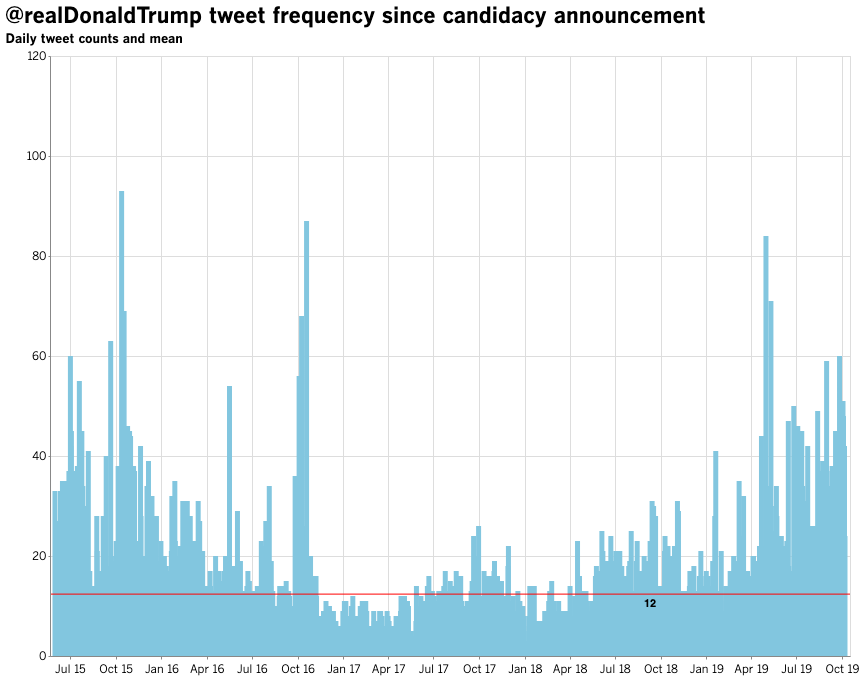

In [32]:
#bars

lines = alt.Chart(trump_tweets_day_candidacy_df, title = '@realDonaldTrump tweet frequency since candidacy announcement').mark_bar().encode(
    x = alt.X('date:T', axis = alt.Axis(title = '', format = ("%b %y"))),
    y = alt.Y('count:Q',
        scale=alt.Scale(domain=(0, 120)), axis = alt.Axis(tickCount=6, title = 'Daily tweet counts and mean')),
)

#rule showing mean

rule = alt.Chart(trump_tweets_day_candidacy_df).mark_rule(color='red').encode(
    y='mean(count):Q'
)

#rule label -- would like to add "Average: " annotation
text = rule.mark_text(
    align='center',
    baseline='middle',
    dx=200,
    dy=10,
    fontWeight='bold',
).encode(
    text=alt.Text('mean(count):Q', format=".2"))

#go
( lines + rule + text ).properties(height=600,width=800)

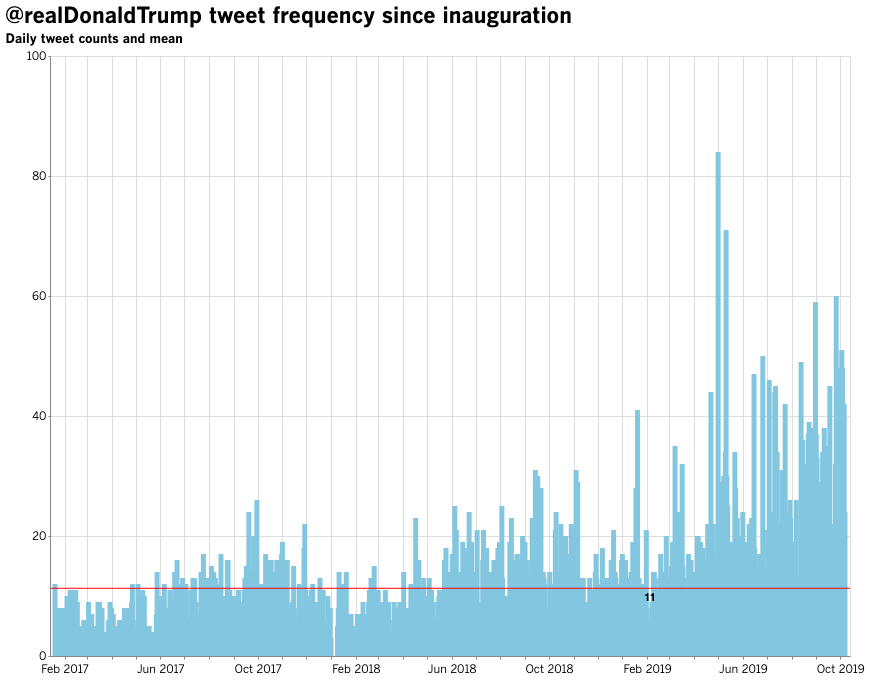

In [33]:
#bars

bars = alt.Chart(trump_freq_inauguration, title = '@realDonaldTrump tweet frequency since inauguration').mark_bar().encode(
    x = alt.X('date:T', axis = alt.Axis(title = '', format = ("%b 20%y"))),
    y = alt.Y('count:Q',
        scale=alt.Scale(domain=(0, 100)), axis = alt.Axis(tickCount=6, title = 'Daily tweet counts and mean')),
)

#rule showing mean

rule = alt.Chart(trump_freq_inauguration).mark_rule(color='red').encode(
    y='mean(count):Q'
)

#rule label -- would like to add "Average: " annotation
text = rule.mark_text(
    align='center',
    baseline='middle',
    dx=200,
    dy=10,
    fontWeight='bold',
).encode(
    text=alt.Text('mean(count):Q', format=".2"))

#go
( bars + rule + text ).properties(height=600,width=800)

In [34]:
trump_freq_inauguration.head()

,date,count
817,2019-05-01,84
827,2019-05-11,71
965,2019-09-26,60
939,2019-08-31,59
972,2019-10-03,51


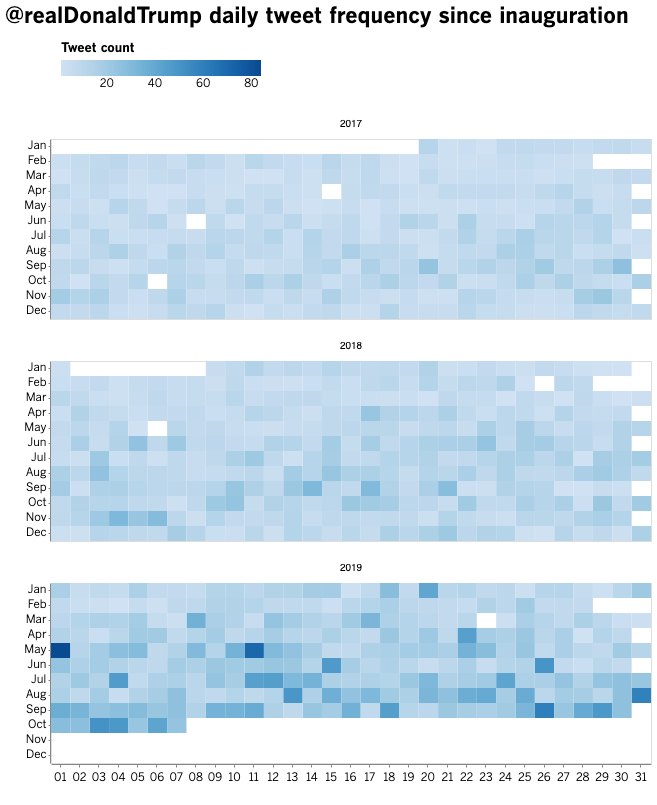

In [66]:
heatmap = alt.Chart(
    trump_freq_inauguration,
    title="@realDonaldTrump daily tweet frequency since inauguration"
).mark_rect().encode(
    x=alt.X('date(date):O', title=' '),
    y=alt.Y('month(date):O', title=''),
    color=alt.Color('count:Q', title='Tweet count', scale=alt.Scale(scheme="blues")),
    tooltip=[
        alt.Tooltip('monthdate(date):T', title='Date'),
        alt.Tooltip('count:Q', title='Tweets')
    ],
    facet=alt.Facet('year(date):O', title='')
).properties(width=600, height=180,columns=1)

heatmap.configure_legend(
    orient='top',
    padding=10
)